In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv


In [2]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataf = pd.read_csv('../input/medical-insurance-premium-prediction/Medicalpremium.csv')

In [4]:
dataf.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
dataf.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
dataf.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


<AxesSubplot:>

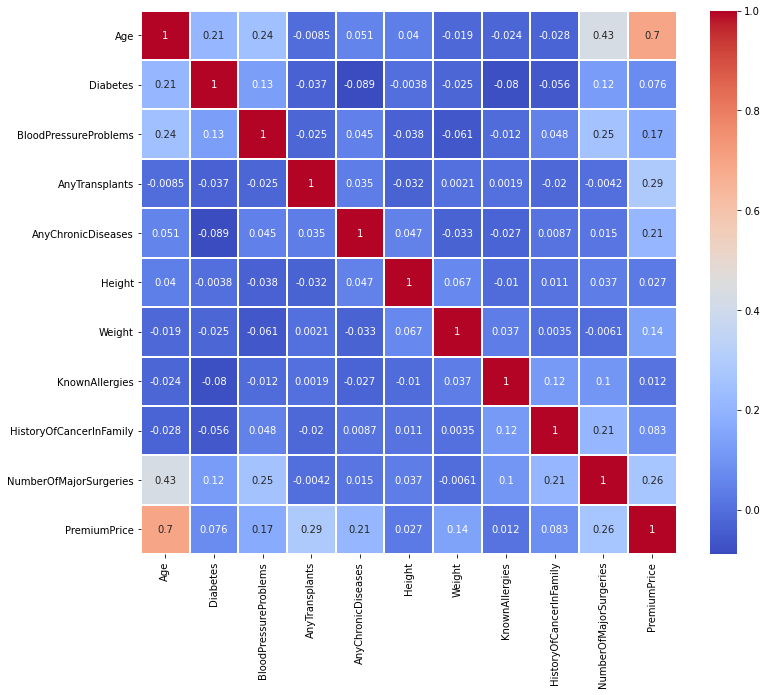

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf.corr(),annot=True,cmap='coolwarm',linewidths=.1)

Age, anytransplants, anychronicdiseases, no og major surgeries are important featues

In [19]:
x=dataf.drop('PremiumPrice',axis=1)
y=dataf['PremiumPrice']

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit= bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Age,3684.410789
1,Diabetes,38.131379
2,BloodPressureProblems,47.971786
3,AnyTransplants,605.471967
4,AnyChronicDiseases,300.219653
5,Height,9.630908
6,Weight,631.927366
7,KnownAllergies,39.431808
8,HistoryOfCancerInFamily,268.761684
9,NumberOfMajorSurgeries,513.597250


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.3982022  0.02334014 0.02437238 0.03860354 0.04843364 0.10241362
 0.16088805 0.02399355 0.03329575 0.14645712]


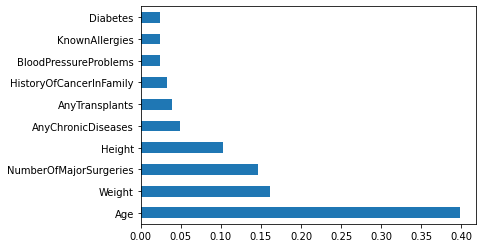

In [28]:
feat_imp =pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

Age, weight, Number of major surgeries, any chornic disases, any transplants, cancer is choosen to move forward for the model


In [32]:
X = x.drop(['Diabetes','KnownAllergies','BloodPressureProblems'],axis=1)
x.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=43)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)
y_pred_tree= d_tree.predict(X_test)
y_prob_tree =d_tree.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_tree)
acc

0.8952702702702703

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf= rf.predict(X_test)
y_prob_rf =rf.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_rf)
acc

0.9358108108108109

In [45]:
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'truth')

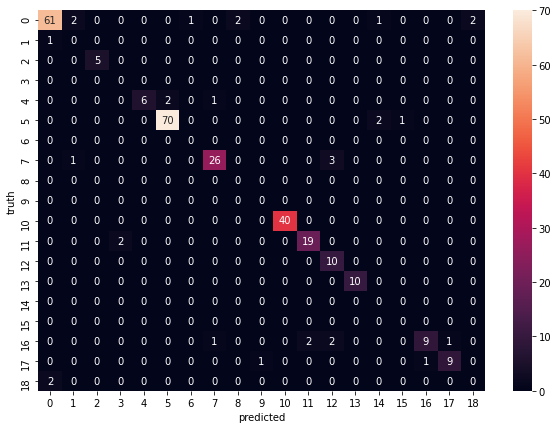

In [47]:
cm_tree = confusion_matrix(Y_test,y_pred_tree)
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

Text(69.0, 0.5, 'truth')

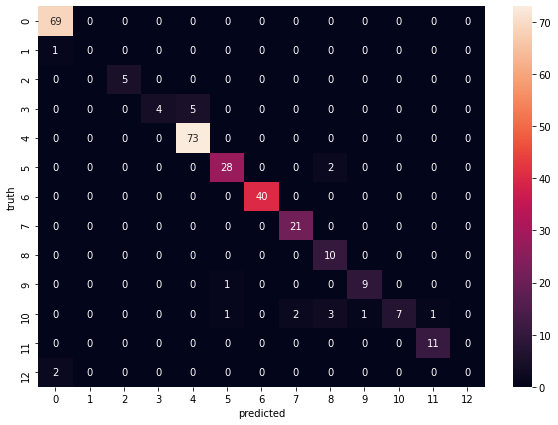

In [49]:
cm_rf = confusion_matrix(Y_test,y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")